<a href="https://colab.research.google.com/github/omiid-n99/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from google.colab import drive

In [51]:
# Load dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/test/traintrain.csv')
# df = pd.read_csv('traintrain.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [53]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [54]:
# Select columns of interest
tweet_df = df[['text', 'sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(31014, 2)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [55]:
# Remove neutral sentiment rows
# tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
# print(tweet_df.shape)
# tweet_df.head(5)

In [56]:
# Convert sentiment labels to numerical values
sentiment_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
tweet_df['sentiment'] = tweet_df['sentiment'].map(sentiment_dict)

sentiment_dict

<ipython-input-56-a6439c95a007>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['sentiment'] = tweet_df['sentiment'].map(sentiment_dict)


{'negative': 0, 'neutral': 1, 'positive': 2}

In [57]:
tweet_df["sentiment"].value_counts()

1    12547
2     9685
0     8782
Name: sentiment, dtype: int64

In [58]:
# Tokenize text data
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet.astype('str'))
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet.astype('str'))
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [59]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 'in': 10, 's': 11, 'for': 12, 'of': 13, 't': 14, 'that': 15, 'me': 16, 'on': 17, 'so': 18, 'have': 19, 'but': 20, 'm': 21, 'just': 22, 'day': 23, 'with': 24, 'be': 25, 'at': 26, 'not': 27, 'was': 28, 'all': 29, 'can': 30, 'good': 31, 'now': 32, 'this': 33, 'out': 34, 'up': 35, 'get': 36, 'are': 37, 'no': 38, 'like': 39, 'go': 40, 'http': 41, 'your': 42, 'love': 43, 'do': 44, 'too': 45, 'work': 46, 'today': 47, 'got': 48, 'going': 49, 'we': 50, 'what': 51, 'lol': 52, 'happy': 53, 'from': 54, 'one': 55, 'u': 56, 'time': 57, 'know': 58, 'com': 59, 'back': 60, 'there': 61, 'really': 62, 'will': 63, 'im': 64, 'don': 65, 'about': 66, 'am': 67, 'its': 68, 'had': 69, 'see': 70, 'if': 71, 'they': 72, 'night': 73, 'some': 74, 'new': 75, 'home': 76, '2': 77, 'how': 78, 'want': 79, 'well': 80, 'think': 81, 'as': 82, 'oh': 83, 'still': 84, 'when': 85, 'much': 86, 'll': 87, 'thanks': 88, 'more': 89, 'he': 90, 'here': 

In [60]:
print(tweet[0])
print(encoded_docs[0])

 I`d have responded, if I were going
[1, 162, 19, 71, 1, 151, 49]


In [61]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1 162  19  71   1
 151  49]


In [62]:
# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(padded_sequence, tweet_df['sentiment'], test_size=0.2, random_state=42)

In [63]:
# Define the model architecture
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(3, activation='softmax'))

In [64]:
# Define the optimizer with a lower learning rate
optimizer = Adam(lr=0.0001)

In [65]:
# Compile the model with the new optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [66]:
# Define early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [67]:
# Fit the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=20, batch_size=64, callbacks=[earlystop])

Epoch 1/20
388/388 [==============================] - 291s 740ms/step - loss: 0.9232 - accuracy: 0.5463 - val_loss: 0.7620 - val_accuracy: 0.6682
Epoch 2/20
388/388 [==============================] - 294s 759ms/step - loss: 0.7226 - accuracy: 0.6942 - val_loss: 0.6888 - val_accuracy: 0.7105
Epoch 3/20
388/388 [==============================] - 298s 770ms/step - loss: 0.6553 - accuracy: 0.7317 - val_loss: 0.6594 - val_accuracy: 0.7269
Epoch 4/20
388/388 [==============================] - 289s 746ms/step - loss: 0.6109 - accuracy: 0.7517 - val_loss: 0.6415 - val_accuracy: 0.7313
Epoch 5/20
388/388 [==============================] - 296s 763ms/step - loss: 0.5794 - accuracy: 0.7664 - val_loss: 0.6461 - val_accuracy: 0.7375
Epoch 6/20
388/388 [==============================] - 290s 747ms/step - loss: 0.5620 - accuracy: 0.7715 - val_loss: 0.6501 - val_accuracy: 0.7355
Epoch 7/20
388/388 [==============================] - 302s 779ms/step - loss: 0.5437 - accuracy: 0.7824 - val_loss: 0.6628 -

In [68]:
# Evaluate the model
loss, accuracy = model.evaluate(test_x, test_y, verbose=0)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 73.27%


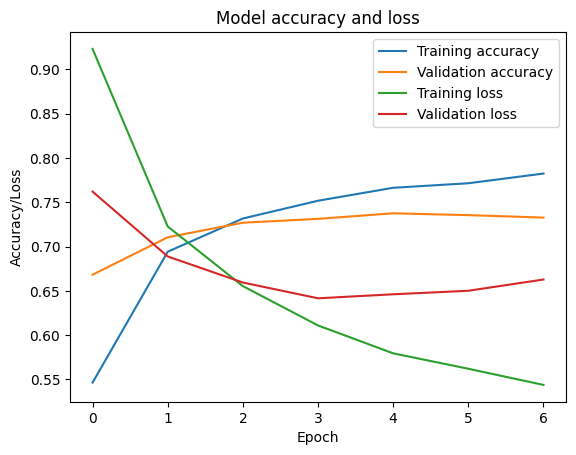

In [69]:
# Plot the accuracyand loss curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [ ]:
# Define function to predict sentiment of input text
def predict_sentiment(model, tokenizer, input_text):
    # Tokenize and pad the input text
    encoded_text = tokenizer.texts_to_sequences([input_text])
    padded_text = pad_sequences(encoded_text, maxlen=200)
    
    # Predict the sentiment using the trained model
    sentiment_prediction = model.predict(padded_text)
    
    # Return the predicted sentiment label
    sentiment_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    predicted_sentiment = sentiment_dict[np.argmax(sentiment_prediction)]
    return predicted_sentiment

# Take input text from user
while True:
    input_text = input("Enter the text to predict the sentiment: ")

    if input_text == "":
        break
    # Predict the sentiment label of the input text
    predicted_sentiment = predict_sentiment(model, tokenizer, input_text)

    # Print the predicted sentiment label
    print("Predicted sentiment: ", predicted_sentiment)

Enter the text to predict the sentiment: Poor quality material inside. I've never had or have foot odor except with these shoes. Bought a pair for my Mom, same thing. Avias used to be great shoes. Would not buy again.
1/1 [==============================] - 0s 322ms/step
Predicted sentiment:  negative
Enter the text to predict the sentiment: The shoes did not have any insoles. I received a pair of shoes that were not even completely put together.
1/1 [==============================] - 0s 49ms/step
Predicted sentiment:  negative
Enter the text to predict the sentiment: I felt like this product was not made in a very sturdy way. I would in no way be able to recommend them.
1/1 [==============================] - 0s 99ms/step
Predicted sentiment:  negative
Enter the text to predict the sentiment: Look nice but that is it. Everything else failed.
1/1 [==============================] - 0s 87ms/step
Predicted sentiment:  neutral
Enter the text to predict the sentiment: The fit isn’t right at a